In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from pandas import DataFrame

In [ ]:
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from skimage import io
from PIL import Image
X=[]
Y=[]
base_path='/content/drive/MyDrive/DATA'
source_path=base_path
for child in os.listdir(source_path):
 print(child)
 sub_path = os.path.join(source_path, child)
 bsub_path = os.path.join(base_path, child)
 if os.path.isdir(sub_path):
  for data_file in os.listdir(sub_path):
    Qry = Image.open(os.path.join(sub_path, data_file))
    Qry = Qry.convert("RGB")
    Qry = np.array(Qry.resize((224,224,)))
    Qry = Qry.reshape([224,224,3])
    #Qry = Qry[:,:,2]
    flist=np.array(Qry)
    X.append(flist)
    Y.append(child)

57
7
54
8
9
56
55
6
53
52
46
43
5
49
45
47
48
50
44
51
38
35
36
37
42
39
40
41
34
4
33
32
26
28
29
27
25
31
3
30
23
21
20
2
16
24
22
18
19
17
0
13
11
15
12
10
14
1


In [ ]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr.shape

(4170, 224, 224, 3)

In [ ]:
images_arr = images_arr.reshape(-1, 224,224, 3)
images_arr = images_arr / np.max(images_arr)

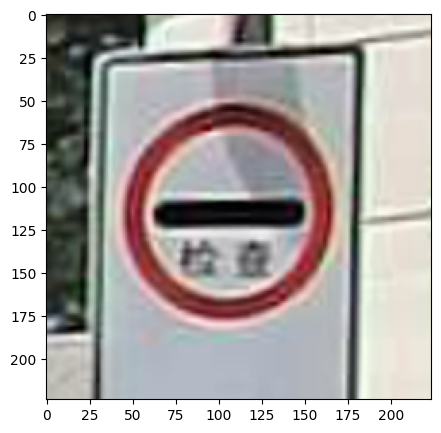

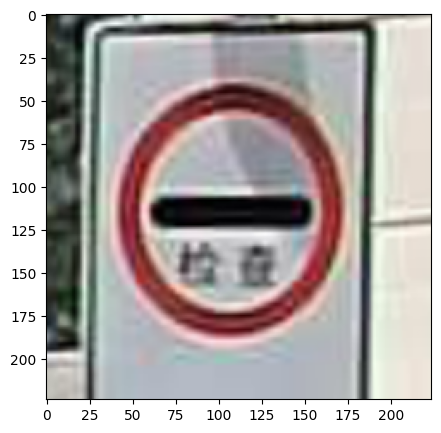

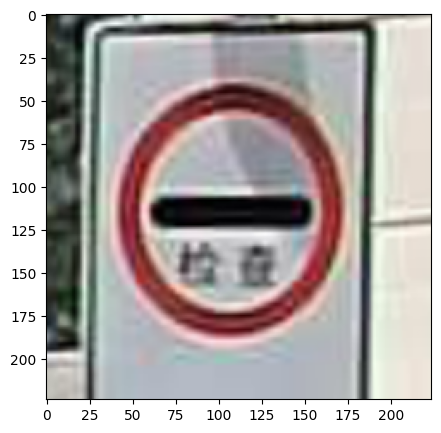

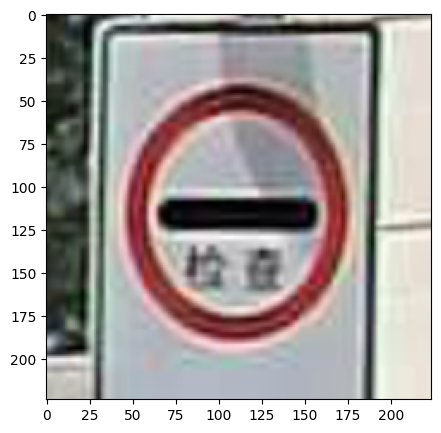

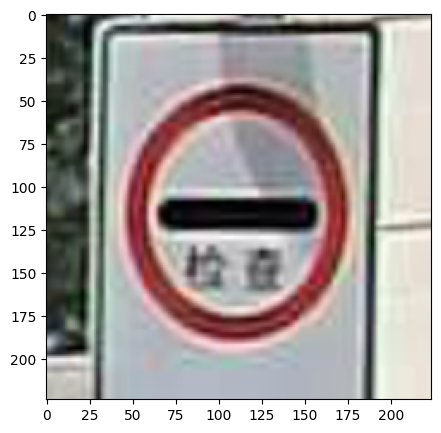

In [ ]:
# Display the first Five images in training data
for i in range(5):
 plt.figure(figsize = [5,5])
 curr_img = np.reshape(images_arr[i], (224,224,3))
 plt.imshow(curr_img)
 plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_arr,y,test_size=0.3,random_state =42)

In [ ]:
print(X_train.shape)

(2919, 224, 224, 3)


In [ ]:
print(y_train.shape)

(2919, 58)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [ ]:
cnnModel= Sequential()
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(224,224,3)))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(100,activation="relu"))
cnnModel.add(Dense(200,activation="relu"))
cnnModel.add(Dense(58,activation="softmax"))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     409728    
                                                        

In [ ]:
cnnModel.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = cnnModel.fit(X_train,y_train,epochs=15,batch_size=32,verbose=1,validation_split=0.15)

Epoch 1/15
78/78 [==============================] - 67s 546ms/step - loss: 3.0836 - accuracy: 0.2600 - val_loss: 2.0576 - val_accuracy: 0.4155
Epoch 2/15
78/78 [==============================] - 28s 362ms/step - loss: 1.6576 - accuracy: 0.5324 - val_loss: 1.6321 - val_accuracy: 0.5137
Epoch 3/15
78/78 [==============================] - 29s 372ms/step - loss: 1.1946 - accuracy: 0.6417 - val_loss: 1.2750 - val_accuracy: 0.6461
Epoch 4/15
78/78 [==============================] - 28s 365ms/step - loss: 0.9234 - accuracy: 0.7050 - val_loss: 0.9528 - val_accuracy: 0.7511
Epoch 5/15
78/78 [==============================] - 30s 380ms/step - loss: 0.7146 - accuracy: 0.7807 - val_loss: 0.8467 - val_accuracy: 0.7648
Epoch 6/15
78/78 [==============================] - 29s 368ms/step - loss: 0.4821 - accuracy: 0.8489 - val_loss: 0.7988 - val_accuracy: 0.7900
Epoch 7/15
78/78 [==============================] - 29s 368ms/step - loss: 0.3889 - accuracy: 0.8710 - val_loss: 0.7285 - val_accuracy: 0.8219

In [ ]:
testLoss, testAccuracy = cnnModel.evaluate(X_test,y_test)
print("Test Accuracy =", testAccuracy)

40/40 [==============================] - 5s 124ms/step - loss: 0.6387 - accuracy: 0.9392
Test Accuracy = 0.9392486214637756


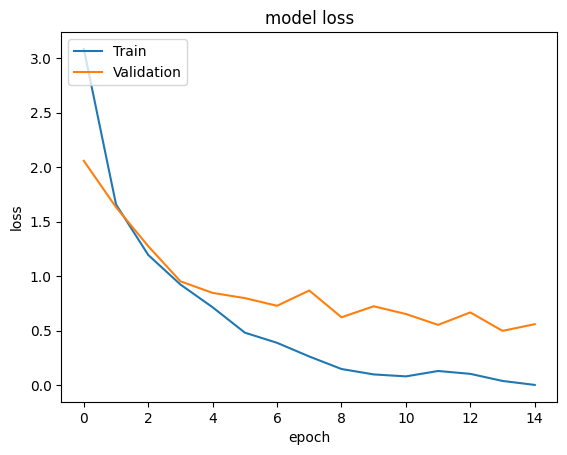

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

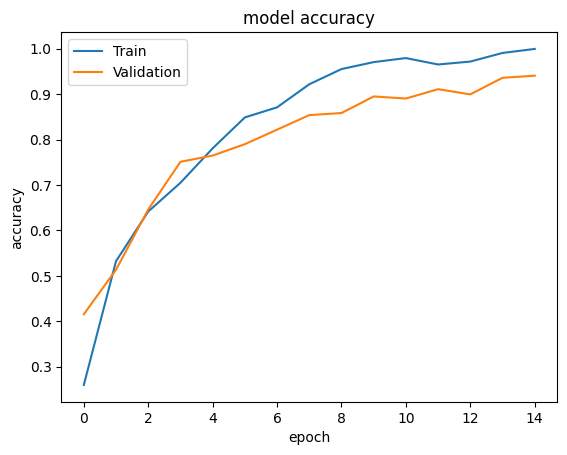

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
image = X[10]
image = image.reshape(-1, 224,224, 3)
image = image / np.max(image)

In [ ]:
pred = cnnModel.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

1/1 [==============================] - 1s 832ms/step
['7']


In [ ]:
cnnModel.save('cnnmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('cnnmodel.h5')
pred = model.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

1/1 [==============================] - 0s 89ms/step
['7']


40/40 [==============================] - 4s 98ms/step


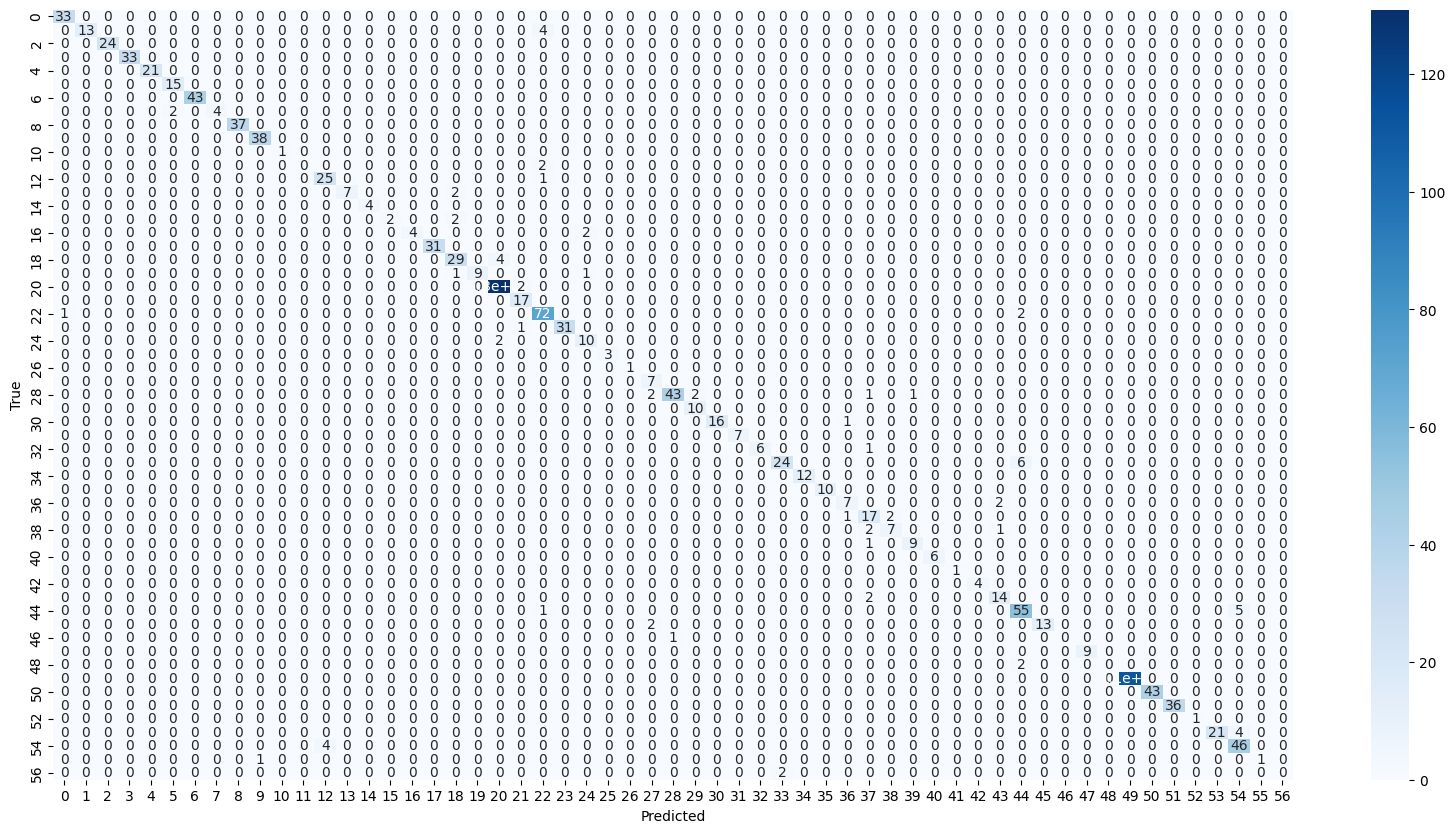

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(20,10))

# Get the predicted labels for the test data
y_pred = cnnModel.predict(X_test)

# Get the true labels for the test data
y_true = y_test

# Convert the predicted labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()